In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../..

/home/nassim/dev/conrl


In [3]:
from src.gngu import GrowingNeuralGas
from graph_tool.draw import graph_draw
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [41]:
n_samples = 1000
#X, y = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = datasets.make_moons(n_samples=n_samples, noise=.1)
#X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

X = StandardScaler().fit_transform(X)


In [43]:
#gngu = GrowingNeuralGas()
gngu = GrowingNeuralGas(e_w=0.1, e_n=0.006, max_age=20, l=10, a=0.5, b=0.995, ndim=2)

for j in range(3):
    for i in range(n_samples):
        gngu.fit(X[i])
    

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a0e61ebe0, at 0x7f8a0e61eb50>

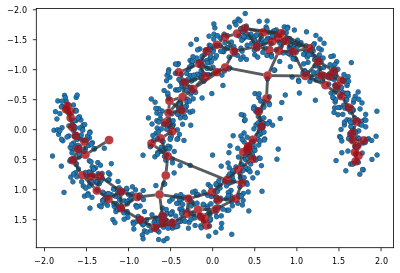

In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.style.use('seaborn-paper')
plt.switch_backend("cairo")

fig, ax = plt.subplots()
color = cm.Dark2(np.linspace(0, 1, 2, endpoint=False))

ax.scatter(X[:, 0], X[:, 1], marker='o', cmap=color, s=25, edgecolor='k', zorder=-2)
graph_draw(gngu.g, pos=gngu.g.vp.pos, output_size=(200, 200), vertex_size=0.12, vertex_pen_width=0.001, edge_pen_width=0.04, mplfig=ax)


In [ ]:
from src.plotting import *

plot_stats(gngu.stats, figsize=(10, 10))